## SVD
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음
- SVD는 특이값 분해로 불리며 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며 모든 특이벡터는 서로 직교하는 성질을 갖는다.
- 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다.
- $\sum$이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.
- A의 차원이 m x n일 때 U의 차원이 m x m, $\sum$의 차원이 m x n, $V^T$의 차원이 n X n으로 분해한다.

$$A = U \sum V^T$$

### SVD 개요

In [1]:
import numpy as np
from numpy.linalg import svd


np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


 SVD(Singular Value Decomposition)를 사용하여 행렬을 분해
 - SVD는 임의의 행렬 A를 세 개의 행렬 $U,Σ,V^T$
 로 분해합니다. 이를 통해 행렬의 구조를 분석하거나 차원을 축소할 수 있습니다.

In [2]:
# SVD 분해 : U 행렬, Sigma 행렬, V 전치 행렬을 반환
# sigma 행렬은 0이 아닌 경우만 1차원 행렬로 표현
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


원본 행렬 복원
- 대각행렬 변환: np.diag 함수를 사용하여 Σ를 대각 행렬로 변환합니다. 이는 SVD의 복원 과정에서 필요합니다.
- 원본 행렬 복원: U, Σ(대각 행렬로 변환된), $V^T$를 곱하여 원본 행렬을 복원합니다.

In [4]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD
- Truncated SVD는 전체 SVD에서 상위 몇 개의 특이값 및 그에 대응하는 특이벡터들만을 사용하여 근사적인 행렬을 복원하는 방법입니다. Truncated SVD는 차원 축소와 데이터 압축에 유용합니다.
- 주로 데이터의 차원을 축소하여 계산 효율성을 높이고 노이즈를 제거하기 위해 사용됩니다.
- 상위 특이값만을 사용하면 데이터의 주요 구조를 유지하면서 차원을 줄일 수 있습니다.

In [8]:
# 다시 svd를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [7]:
# U행렬의 경우는 sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_ , Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[ 0.118 -0.422 -0.451 -0.303]
 [-0.265  1.188  1.62   0.38 ]
 [ 0.083  0.528  1.784 -1.258]
 [ 0.305 -0.107  1.341 -2.03 ]]


Truncated SVD를 이용한 행렬 분해

svd vs svds
- svd는 입력 행렬을 완전하게 분해하여 모든 특이값과 특이벡터를 반환. 중소규모의 행렬에 적합
- svds 함수는 희소 행렬 또는 매우 큰 행렬에 대해 SVD를 수행할 때 사용
- svd는 주어진 개수의 가장 큰 특이값과 그에 대응하는 특이벡터만을 계산해서 계산 비용을 절약하고 효율성을 높인다

In [10]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)


# Truncated Svd로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원:  (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

복원된 행렬의 상태
- runcated SVD는 일부 특이값만 사용하기 때문에 원본 행렬을 완벽하게 복원하지 못할 수 있습니다. 복원된 행렬은 근사치가 됩니다.
- Truncated SVD를 사용하여 복원된 행렬과 원본 행렬 간의 차이를 비교할 수 있습니다.

Task1_0731. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요.

- from sklearn.decomposition import TruncatedSVD

In [22]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
Scale = StandardScaler().fit_transform(df)

svd = TruncatedSVD(n_components=2)
df_red = svd.fit_transform(Scale)

df_svd = pd.DataFrame(df_red,columns=['component1','component2'])
df_svd['target'] = iris.target
df_svd.head()

,component1,component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


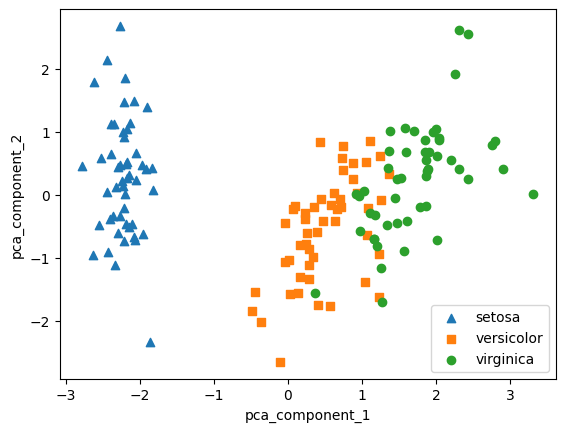

In [25]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df_svd[df_svd.target == i]['component1']
    y_axis_data = df_svd[df_svd.target == i]['component2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

Task2_0731. Task1_0731 사례를 PCA로 적용한 시각화 결과와 비교하세요.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_red1 = pca.fit_transform(Scale)


df_iris_pca = pd.DataFrame(df_red1, columns=['components1','components2'])
df_iris_pca['target'] = iris.target
df_iris_pca.head()

,components1,components2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


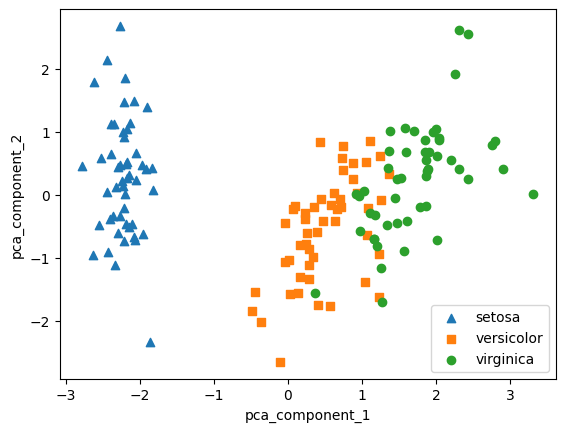

In [28]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df_iris_pca[df_iris_pca.target == i]['components1']
    y_axis_data = df_iris_pca[df_iris_pca.target == i]['components2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

#### NMF
- NMF(Non-negative Matrix Factorization, 비음수 행렬 분해)은 행렬을 두 개의 작은 행렬의 곱으로 분해하는 기법으로, 분해된 행렬의 모든 요소가 비음수(0 또는 양수)인 특징이 있습니다. 주로 데이터 마이닝, 이미지 처리, 텍스트 마이닝, 추천 시스템 등에서 사용됩니다.
- 주어진 행렬 V를 두 개의 비음수 행렬 W와 H로 분해하는 것을 목표로 합니다. 특정한 최적화 방법을 지정하지 않으며, 일반적으로는 곱셈 업데이트 규칙을 사용합니다. 그러나 SGD를 사용하여 NMF를 최적화할 수도 있습니다.
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭

Text(0, 0.5, 'NMF Component 2')

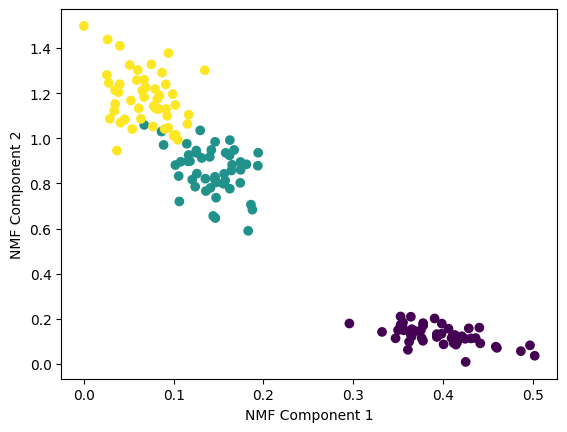

In [11]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

# scaler = StandardScaler()
# iris_scaled = scaler.fit_transform(iris_ftrs) # 마이너스가 나올 수 있으므로 생략

nmf = NMF(n_components=2, max_iter=500)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y = iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

Task3_0731. 와인 품질 데이터셋을 사용하여 Truncated SVD를 통해 차원 축소를 수행하고, 로지스틱 회귀 모델을 학습 및 평가를 수행하세요.(다음 사항 참조)

- 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
- 레이블 변환: 와인 품질을 범주형 변수로 변환합니다. 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
- 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
- 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
- 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
- 모델 학습: 로지스틱 회귀 모델을 학습합니다.
- 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

In [42]:
import pandas as pd

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
# 레이블 분리
X = data.drop('quality',axis=1)
y = data.quality

# 레이블 변환
bins=[2,5,6,8]
labels = ['low','medium','high']

data_y = pd.cut(data.quality, bins=bins,labels=labels, right=True)

# 정규화
scaler = StandardScaler()
Scaled = scaler.fit_transform(X)

# 차원 축소

svd = TruncatedSVD(n_components=5)

data_X = svd.fit_transform(Scaled)





In [40]:
data_X_df = pd.DataFrame(data_X, columns=[f'PC{i+1}' for i in range(data_X.shape[1])])
data_y_df = pd.DataFrame(data_y, columns=['quality'])

# 데이터 결합
data = pd.concat([data_X_df, data_y_df], axis=1)
print(data.head())

        PC1       PC2       PC3       PC4       PC5 quality
0 -1.619530  0.450950 -1.774454  0.043740  0.067014     low
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392     low
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531     low
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149  medium
4 -1.619530  0.450950 -1.774454  0.043740  0.067014     low


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = data.drop('quality',axis=1)
y = data.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
print(f"Test Accuracy ; {accuracy:.4f}")
print('\nClassification Report :')
print(report)

Test Accuracy ; 0.5719

Classification Report :
              precision    recall  f1-score   support

        high       0.44      0.26      0.32        47
         low       0.64      0.80      0.71       141
      medium       0.50      0.44      0.47       132

    accuracy                           0.57       320
   macro avg       0.53      0.50      0.50       320
weighted avg       0.55      0.57      0.55       320



데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
모델 학습: 로지스틱 회귀 모델을 학습합니다.
모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

<Axes: >

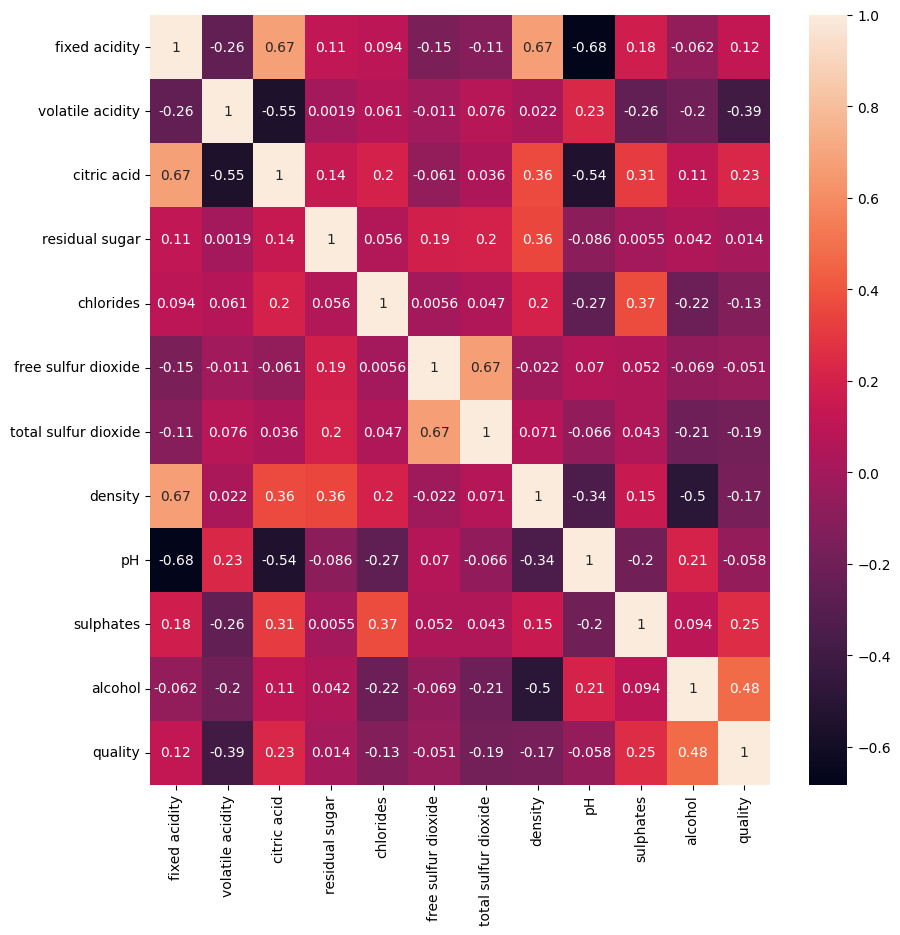

In [33]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)